In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
birddata = pd.read_csv("bird_tracking.csv", index_col=0)
birddata.head()

altitude               date_time  device_info_serial   direction  \
0        71  2013-08-15 00:18:08+00                 851 -150.469753   
1        68  2013-08-15 00:48:07+00                 851 -136.151141   
2        68  2013-08-15 01:17:58+00                 851  160.797477   
3        73  2013-08-15 01:47:51+00                 851   32.769360   
4        69  2013-08-15 02:17:42+00                 851   45.191230   

    latitude  longitude  speed_2d bird_name  
0  49.419860   2.120733  0.150000      Eric  
1  49.419880   2.120746  2.438360      Eric  
2  49.420310   2.120885  0.596657      Eric  
3  49.420359   2.120859  0.310161      Eric  
4  49.420331   2.120887  0.193132      Eric

In [3]:
ix = birddata.bird_name == "Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix]

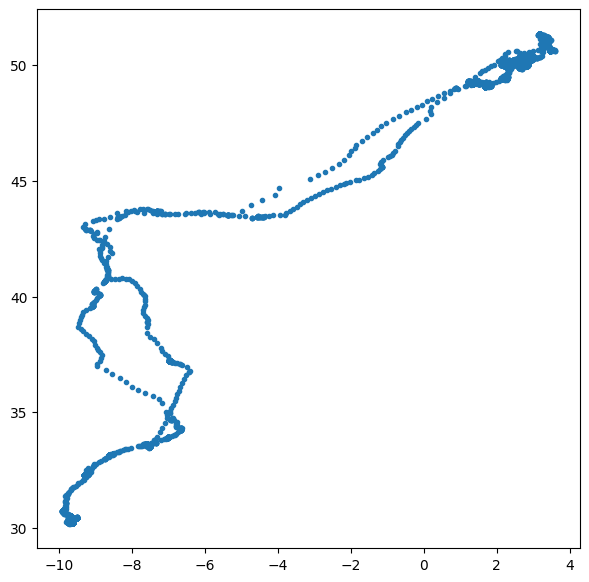

In [4]:
plt.figure(figsize=(7,7))
plt.plot(x, y, ".");

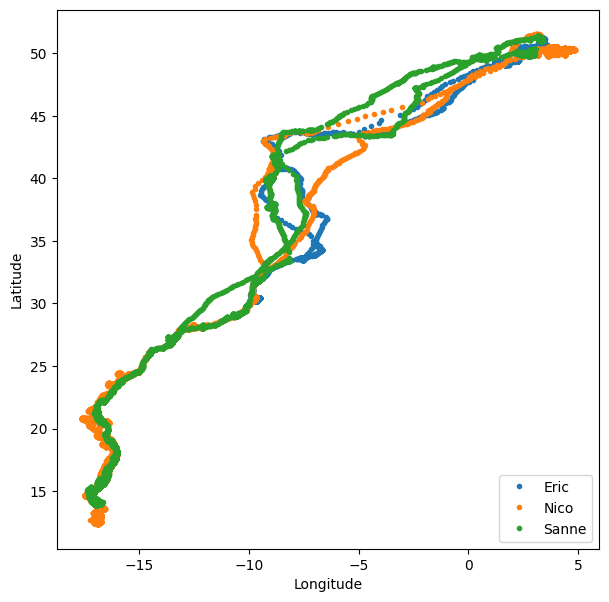

In [5]:
bird_names = pd.unique(birddata.bird_name)
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x, y, ".", label= bird_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right");

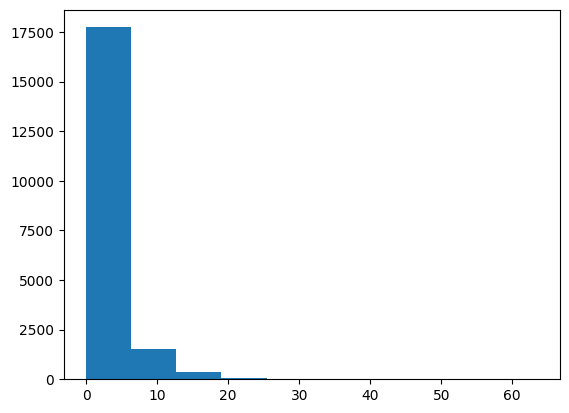

In [6]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
# There are elements that are not numbers
np.sum(np.isnan(speed))
ind = np.isnan(speed)
# ~ turns the false to true and viceversa
plt.hist(speed[~ind]);

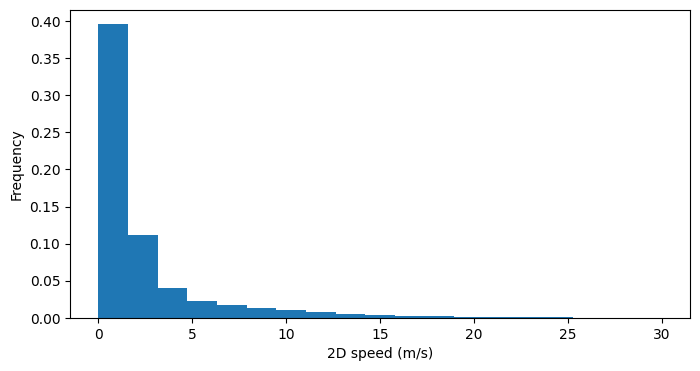

In [7]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name == "Eric"]
ind = np.isnan(speed)
# normed has been deprecated, use density
plt.hist(speed[~ind], bins= np.linspace(0, 30, 20), density= True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

In [8]:
date_str = birddata.date_time[0]
date_str[:-3]
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [9]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [10]:
# Add the timestamps as a new column to the original birddata 
birddata["timestamp"] = pd.Series(timestamps, index= birddata.index)
birddata.head()

altitude               date_time  device_info_serial   direction  \
0        71  2013-08-15 00:18:08+00                 851 -150.469753   
1        68  2013-08-15 00:48:07+00                 851 -136.151141   
2        68  2013-08-15 01:17:58+00                 851  160.797477   
3        73  2013-08-15 01:47:51+00                 851   32.769360   
4        69  2013-08-15 02:17:42+00                 851   45.191230   

    latitude  longitude  speed_2d bird_name           timestamp  
0  49.419860   2.120733  0.150000      Eric 2013-08-15 00:18:08  
1  49.419880   2.120746  2.438360      Eric 2013-08-15 00:48:07  
2  49.420310   2.120885  0.596657      Eric 2013-08-15 01:17:58  
3  49.420359   2.120859  0.310161      Eric 2013-08-15 01:47:51  
4  49.420331   2.120887  0.193132      Eric 2013-08-15 02:17:42

In [11]:
# We'll create a list that captures the amount of time elapsed since data collection started
# Extract timestamps for Eric
times = birddata.timestamp[birddata.bird_name == "Eric"]
# A list containing how much time has passed for each entry since be begining of the data collection
elapsed_time = [time - times[0] for time in times]
elapsed_time[0:3]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50')]

In [12]:
# Convert the timedelta to days
print(elapsed_time[1000] / datetime.timedelta(days=1))
# Convert the timedelta to hours
print(elapsed_time[1000] / datetime.timedelta(hours=1))

12.084722222222222
290.03333333333336


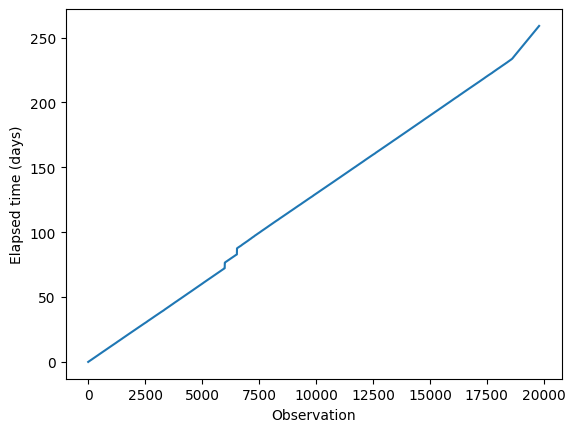

In [13]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");

In [14]:
# Calculate the mean speed for each day
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speeds = []
for (i, t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speeds.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

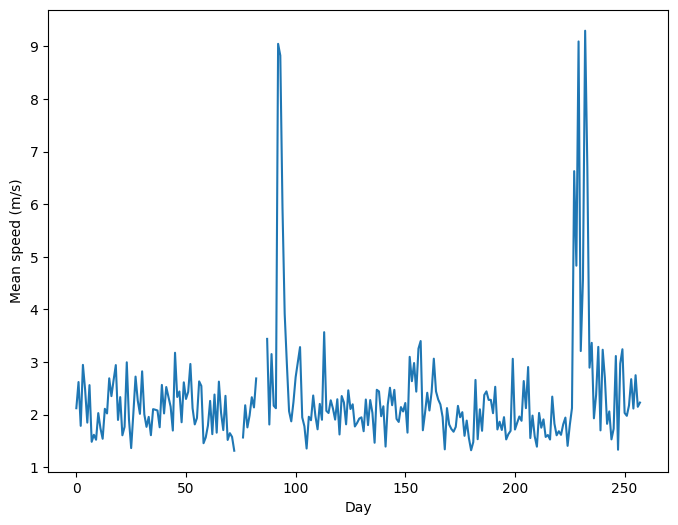

In [15]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speeds)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)");

In [16]:
sanne_time = birddata[birddata.bird_name == "Sanne"]
sanne_time.head()

altitude               date_time  device_info_serial   direction  \
40916        55  2013-08-15 00:01:08+00                 833  -91.499509   
40917        54  2013-08-15 00:31:00+00                 833 -141.804053   
40918        55  2013-08-15 01:01:19+00                 833  -10.651840   
40919        56  2013-08-15 01:31:38+00                 833   14.727689   
40920        55  2013-08-15 02:01:24+00                 833 -169.882200   

        latitude  longitude  speed_2d bird_name           timestamp  
40916  49.931065   2.281893  0.372156     Sanne 2013-08-15 00:01:08  
40917  49.931076   2.281900  1.318484     Sanne 2013-08-15 00:31:00  
40918  49.931016   2.281933  0.076158     Sanne 2013-08-15 01:01:19  
40919  49.931053   2.281911  0.014142     Sanne 2013-08-15 01:31:38  
40920  49.931042   2.281893  0.094340     Sanne 2013-08-15 02:01:24

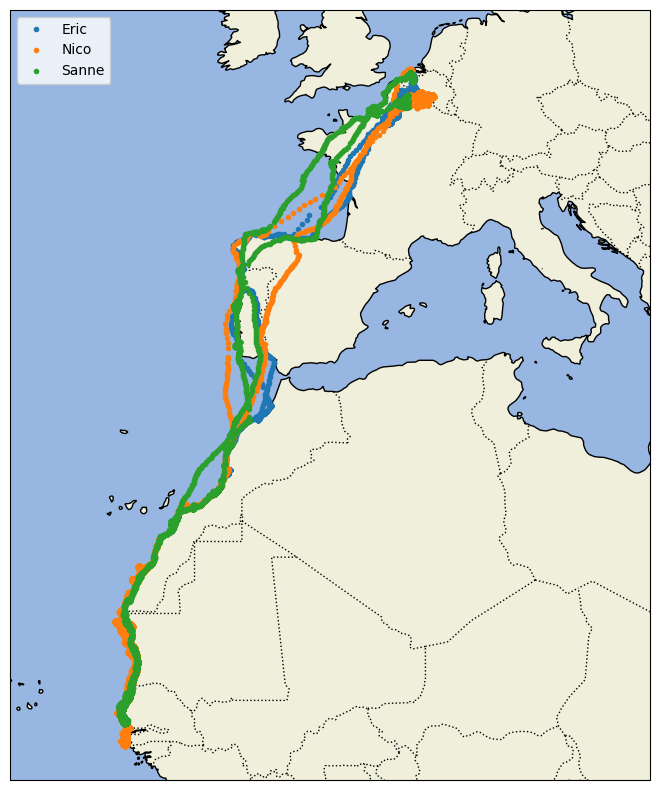

In [17]:
proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle= ":")

for name in bird_names:
    ix = birddata["bird_name"] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, ".", transform= ccrs.Geodetic(), label = name)

plt.legend(loc= "upper left");